## Unesco World Heritage Sites Visualisation


## Data to use

 UNESCO designates landmarks as World Heritage Sites for cultural, historical, scientific, or other significance. The sites contain "cultural and natural heritage worldwide, considered of outstanding value to humanity".

So I'm curious about the Mexican Heritage Sites included in the list, and to learn more about them, I will use a dataset from Kaggle, which is already curated:

Unesco Heritage sites(2021) from Jam Ras Maurya.
https://www.kaggle.com/ramjasmaurya/unesco-heritage-sites2021
https://www.kaggle.com/ramjasmaurya

More data on the World Heritage List and other details can be found at https://whc.unesco.org.

## Libraries set up


First we import the libraries we will be using and load the csv file and make it a dataframe

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


Once I have the dataset, I will work with it as a pandas dataframe

In [2]:
df = pd.read_csv('C:/Users/EDGAR/OneDrive/Documentos/MSc Data Science and AI/Other projects/Unesco/whc-sites(tangibles)-2021.csv')

## Data Exploration and cleaning

I can see the database has 1155 entries, in this case, heritage sites in the world and also contains 15 columns

In [3]:
df.shape

(1155, 15)

Let's look a the columns we have

In [4]:
df.columns

Index(['Name', 'short_description', 'date_inscribed', 'danger', 'date_end',
       'longitude', 'latitude', 'area_hectares', 'category_long',
       'category_short', 'Country name', 'Region', 'iso_code', 'transboundary',
       'rev_bis'],
      dtype='object')

The columns category_short, iso_code and rev_bis seem not to be useful for our purposes so we will delet it

In [5]:
df=df.drop('category_short',axis=1)
df=df.drop('iso_code',axis=1)
df=df.drop('rev_bis',axis=1)

I want to know what kind of categories we have

In [6]:
df['category_long'].unique()

array(['Cultural', 'Natural', 'Mixed'], dtype=object)

I also want to know the regions we have. I see weir combinations but I will fix it later.

In [7]:
df['Region'].unique()

array(['Europe and North America', 'Latin America and the Caribbean',
       'Africa', 'Arab States', 'Asia and the Pacific',
       'Asia and the Pacific,Europe and North America',
       'Asia and the Pacific,Europe and North America,Latin America and the Caribbean'],
      dtype=object)

The first obvious question that comes to mind is: How many heritage sites does Mexico hold? 

In [8]:
df[df['Country name']=='Mexico'].count()

Name                 35
short_description    35
date_inscribed       35
danger               35
date_end              0
longitude            35
latitude             35
area_hectares        35
category_long        35
Country name         35
Region               35
transboundary        35
dtype: int64

We find out that the answer is 35, but is that a considerable amount, or is this just average or maybe very low? Let's find out.

Let's observe the top 20 countries. There Mexico is, in 7th place.

In [9]:
df.groupby('Country name').count().sort_values(by='Name',ascending=False).head(20)

,Name,short_description,date_inscribed,danger,date_end,longitude,latitude,area_hectares,category_long,Region,transboundary
Country name,,,,,,,,,,,
China,55,55,55,55,0,55,55,54,55,55,55
Italy,51,51,51,51,0,51,51,50,51,51,51
Spain,45,45,45,45,0,45,45,44,45,45,45
France,43,43,43,43,0,43,43,42,43,43,43
Germany,41,41,41,41,1,41,41,40,41,41,41
India,39,39,39,39,2,39,39,39,39,39,39
Mexico,35,35,35,35,0,35,35,35,35,35,35
United Kingdom of Great Britain and Northern Ireland,32,32,32,32,1,32,32,32,32,32,32
Russian Federation,26,26,26,26,0,26,26,26,26,26,26


Let's observe the top 20 countries.
Now I want to explore data by region. But at this point, we observe something strange. Europe and North America, for some reason, form one area. There is also one region called 'Asia and the Pacific' but 'Asia and the Pacific, Europe and North America', 'Asia and the Pacific, Europe and North America, Latin America and the Caribbean' also exist. That seems redundant, so we need to fix it.

In [10]:
df['Region'].unique()

array(['Europe and North America', 'Latin America and the Caribbean',
       'Africa', 'Arab States', 'Asia and the Pacific',
       'Asia and the Pacific,Europe and North America',
       'Asia and the Pacific,Europe and North America,Latin America and the Caribbean'],
      dtype=object)

First, let's separate North America from Europe. I will list all the countries in this region.

In [11]:
df[(df['Region']=='Europe and North America') & (df['transboundary']==0)]['Country name'].unique()

array(['Canada', 'Germany', 'Poland', 'United States of America',
       'Bulgaria', 'Croatia', 'France', 'Italy', 'Montenegro', 'Norway',
       'Serbia', 'Cyprus', 'Malta', 'Portugal', 'Switzerland', 'Holy See',
       'Spain', 'Turkey', 'Greece', 'Slovenia',
       'United Kingdom of Great Britain and Northern Ireland', 'Hungary',
       'Russian Federation', 'Ukraine', 'Finland', 'Romania', 'Sweden',
       'Albania', 'Czechia', 'Ireland', 'Slovakia', 'Denmark', 'Georgia',
       'Lithuania', 'Luxembourg', 'Netherlands', 'Armenia', 'Austria',
       'Estonia', 'Latvia', 'Belgium', 'Azerbaijan', 'Belarus', 'Israel',
       'Andorra', 'Iceland', 'Bosnia and Herzegovina', 'San Marino'],
      dtype=object)

United Kingdom of Great Britain and Northern Ireland is such a long name. For simplicity, I will replace it with United Kingdom.

In [12]:
df.loc[(df['Country name']=='United Kingdom of Great Britain and Northern Ireland') , 'Country name'] = 'United Kingdom'

Now, I will set the column "Region" as "North America" for the instances in which the column "Country name" is Canada or United States of America.

In [13]:
df.loc[(df['Country name']=='Canada') | (df['Country name']=='United States of America') , 'Region'] = 'North America'

And the region that used to be "Europe and North America" now will be "Europe".

In [14]:
df.loc[(df['Region']=='Europe and North America') , 'Region'] = 'Europe'

We can see the data frame successfully updated.

In [15]:
df[(df['Country name']=='Canada') | (df['Country name']=='United States of America')].head(3)

,Name,short_description,date_inscribed,danger,date_end,longitude,latitude,area_hectares,category_long,Country name,Region,transboundary
0,L’Anse aux Meadows National Historic Site,<p>At the tip of the Great Northern Peninsula ...,1978,0,NaN,-55.616667,51.466667,7991.0,Cultural,Canada,North America,0
1,Nahanni National Park,"<p>Located along the South Nahanni River, one ...",1978,0,NaN,-125.589444,61.547222,476560.0,Natural,Canada,North America,0
10,Mesa Verde National Park,<p>A great concentration of ancestral Pueblo I...,1978,0,NaN,-108.485556,37.261667,21043.0,Cultural,United States of America,North America,0


Grouping the data frame, we can see that we still need to fix the redundant "Asia and the Pacific, Europe and North America", "Asia and the Pacific, Europe and North America, Latin America and the Caribbean". So first, we need to see what sites correspond to these regions.

In [16]:
df.groupby('Region').count()

,Name,short_description,date_inscribed,danger,date_end,longitude,latitude,area_hectares,category_long,Country name,transboundary
Region,,,,,,,,,,,
Africa,98,98,98,98,10,98,98,98,98,98,98
Arab States,88,88,88,88,4,88,88,83,88,88,88
Asia and the Pacific,275,275,275,275,7,275,275,273,275,275,275
"Asia and the Pacific,Europe and North America",2,2,2,2,0,2,2,2,2,2,2
"Asia and the Pacific,Europe and North America,Latin America and the Caribbean",1,1,1,1,0,1,1,1,1,1,1
Europe,505,505,505,505,11,505,505,492,505,505,505
Latin America and the Caribbean,146,146,146,146,7,146,146,146,146,146,146
North America,40,40,40,40,2,40,40,40,40,40,40


I see 2 sites in a region Asia and the Pacific,Europe and North America
How can it be in 3 regions?

Uvs Nuur Basin (https://whc.unesco.org/en/list/769/) is between Mongolia and Russia



Landscapes of Dauria (https://whc.unesco.org/en/list/1448/) is between Mongolia and Russia as well

I will change the region to Asia and the Pacific

In [18]:
df.loc[df['Region']== 'Asia and the Pacific,Europe and North America']

,Name,short_description,date_inscribed,danger,date_end,longitude,latitude,area_hectares,category_long,Country name,Region,transboundary
752,Uvs Nuur Basin,"<p>The Uvs Nuur Basin (1,068,853 ha), is the n...",2003,0,NaN,92.719722,50.275000,898063.5,Natural,"Mongolia,Russian Federation","Asia and the Pacific,Europe and North America",1
1072,Landscapes of Dauria,<p>Shared between Mongolia and the Russian Fed...,2017,0,NaN,115.425444,49.930222,912624.0,Natural,"Mongolia,Russian Federation","Asia and the Pacific,Europe and North America",1


In [19]:
df.loc[(df['Region']=='Asia and the Pacific,Europe and North America') , 'Region'] = 'Asia and the Pacific'

I see 1 sites in a region Asia and the Pacific,Europe and North America,Latin America and the Caribbean
How can it be in 4 regions?

The Architectural Work of Le Corbusier (https://whc.unesco.org/en/list/1321/) is a series of 17 sites across
7 countries, however the latitude and longitude are not correct. For simplicity this entry will be deleted






In [20]:
df=df.drop(df.loc[df['Region']== 'Asia and the Pacific,Europe and North America,Latin America and the Caribbean'].index[0])

## Data Visualisation

Now we have our dataframe clean, we are ready now to gain some insights.

First I would like to compare the amount of sites by region.

In [21]:
df_region = df.groupby('Region').count()
df_region.reset_index(inplace=True)




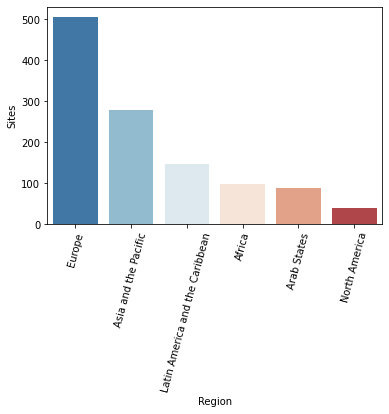

In [53]:
sns.barplot(x='Region', y='Name', data=df_region.sort_values(by='Name',ascending=False), palette='RdBu_r')
plt.ylabel("Sites")
plt.xticks(rotation=75)
plt.show()

In [23]:
top20_countries=df.groupby('Country name').count().sort_values(by='Name',ascending=False).head(20)
top20_countries.reset_index(inplace=True)

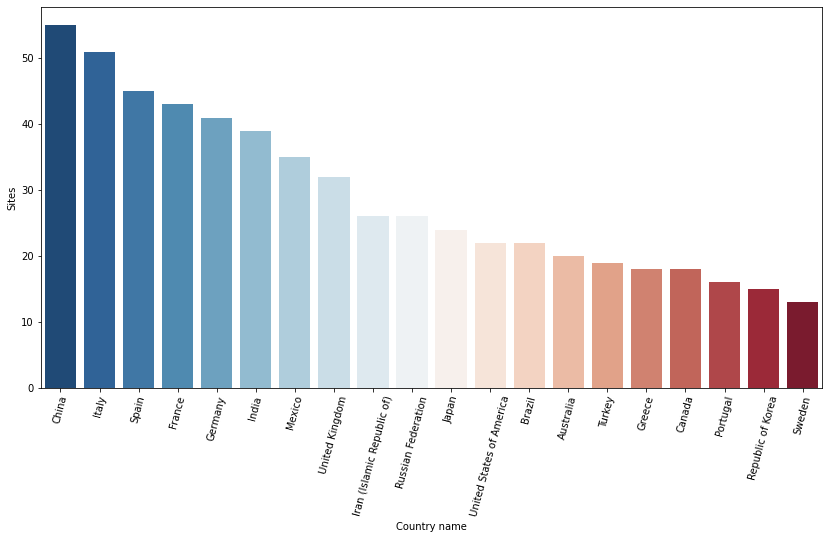

In [54]:
plt.figure(figsize=(14,7))
ax=sns.barplot(x='Country name', y='Name', data=top20_countries, palette='RdBu_r')
plt.ylabel("Sites")
plt.xticks(rotation=75)
plt.show()

We can get the top 5 by region using the query shown below.

In [39]:
df[df['Region']=='Latin America and the Caribbean'].groupby('Country name').count().sort_values(by='Name',ascending=False).head()

,Name,short_description,date_inscribed,danger,date_end,longitude,latitude,area_hectares,category_long,Region,transboundary
Country name,,,,,,,,,,,
Mexico,35,35,35,35,0,35,35,35,35,35,35
Brazil,22,22,22,22,1,22,22,22,22,22,22
Peru,12,12,12,12,0,12,12,12,12,12,12
Cuba,9,9,9,9,0,9,9,9,9,9,9
Colombia,8,8,8,8,1,8,8,8,8,8,8


The fastest way of getting the top 5 of every region is populating a list with these top 5's created through a for loop.

In [30]:
regions_top5_list=[]
for region in df['Region'].unique():
    top5_df=df[df['Region']==region].groupby('Country name').count().sort_values(by='Name',ascending=False).head()
    top5_df.reset_index(inplace=True)
    regions_top5_list.append(top5_df)
    

Time to plot every region Top 5.

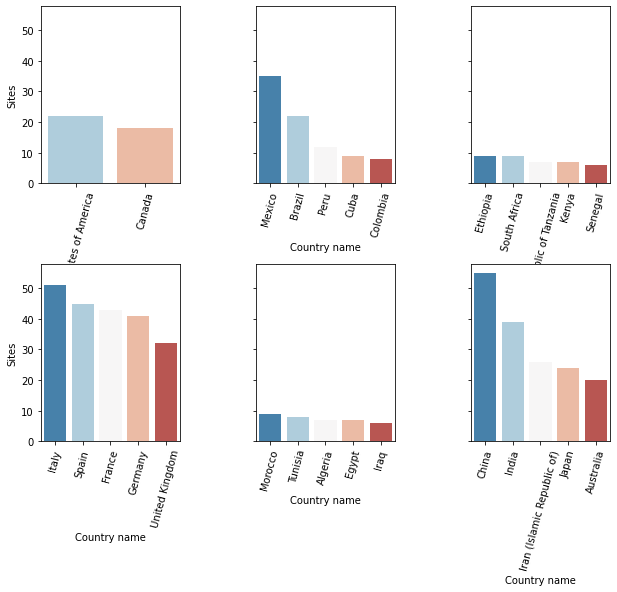

In [72]:
fig, axes = plt.subplots(2, 3, figsize=(10,8), sharey=True)
fig.tight_layout(pad=6.0)


sns.barplot(data=regions_top5_list[0], x='Country name', y='Name',ax=axes[0,0], palette='RdBu_r')
sns.barplot(data=regions_top5_list[1], x='Country name', y='Name', ax=axes[0,1], palette='RdBu_r')
sns.barplot(data=regions_top5_list[2], x='Country name', y='Name', ax=axes[0,2], palette='RdBu_r')
sns.barplot(data=regions_top5_list[3], x='Country name', y='Name',ax=axes[1,0], palette='RdBu_r')
sns.barplot(data=regions_top5_list[4], x='Country name', y='Name', ax=axes[1,1], palette='RdBu_r')
sns.barplot(data=regions_top5_list[5], x='Country name', y='Name', ax=axes[1,2], palette='RdBu_r')

axes[0,0].set(ylabel="Sites")
axes[0,1].set(ylabel="")
axes[0,2].set(ylabel="")
axes[1,0].set(ylabel="Sites")
axes[1,1].set(ylabel="")
axes[1,2].set(ylabel="")
  
axes[0,0].tick_params('x', labelrotation=75)
axes[0,1].tick_params('x', labelrotation=75)
axes[0,2].tick_params('x', labelrotation=75)
axes[1,0].tick_params('x', labelrotation=75)
axes[1,1].tick_params('x', labelrotation=75)
axes[1,2].tick_params('x', labelrotation=75)

We will use the Plotly library to plot every heritage site on the map.

In [44]:
px.set_mapbox_access_token("pk.eyJ1IjoiZXZlZ2FyY2lhbnoiLCJhIjoiY2t5ZXR6MXVrMWNlNjJxbzhjcmptdWg2bSJ9.fmrbGI8SzC0WlouTElFzlA")
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",color="category_long",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=20,zoom=12)
fig.show()

We can plot each region separately, defining a data frame with the desired area.

In [47]:
df_toPlot=df[df['Region']=='Latin America and the Caribbean']

In [48]:
fig = px.scatter_mapbox(df_toPlot, lat="latitude", lon="longitude",color="category_long",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=20,zoom=12)
fig.show()

In [49]:
df_toPlot=df[df['Country name']=='Mexico']

In [50]:
fig = px.scatter_mapbox(df_toPlot, lat="latitude", lon="longitude",color="category_long",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=20,zoom=12)
fig.show()